## SEIRD model
The SEIRD model is an extension on the SIR model, with two extra compartments
– E or exposed (exposed to an infected person but not yet affected, or in the
incubation period), and D or dead. Adding the ‘dead’ compartment has two
advantages – it clearly distinguishes between those who have recovered and those
who are dead, and also, it opens up the scope for eventually including the
possibility of re-infection, as is the case with COVID-19. As compared to the SIRD model, it has the advantage of bringing back the **exposed** compartment, which is a parameter that is realistically important in the case of epidemics, as a person does not immediately become an infector as soon as they come in contact with an infected person.<br><br>This model is a pretty good approximation of the states in COVID-19 (disregarding the possibility of re-infection).

The SEIRD model is defined by the following system of ODEs:

\begin{equation}
        \frac{dS}{dt} =    \frac{-\beta S I}{N}
\end{equation}

\begin{equation}
        \frac{dE}{dt} =    \frac{-\beta S I}{N}- \alpha E
\end{equation}

\begin{equation}
        \frac{dI}{dt} =    \alpha E - \gamma (1 - \mu) I - \gamma \mu I
\end{equation}

\begin{equation}
        \frac{dR}{dt} =    \gamma (1 - \mu) I
\end{equation}

\begin{equation}
        \frac{dD}{dt} =    \gamma \mu I
\end{equation}<br>
The definitions of $\beta$, $\gamma$ and $\mu$ are the same as before. The parameter $\alpha$ from the SEIR model makes a comeback here, with the same meaning (reciprocal of the incubation period).

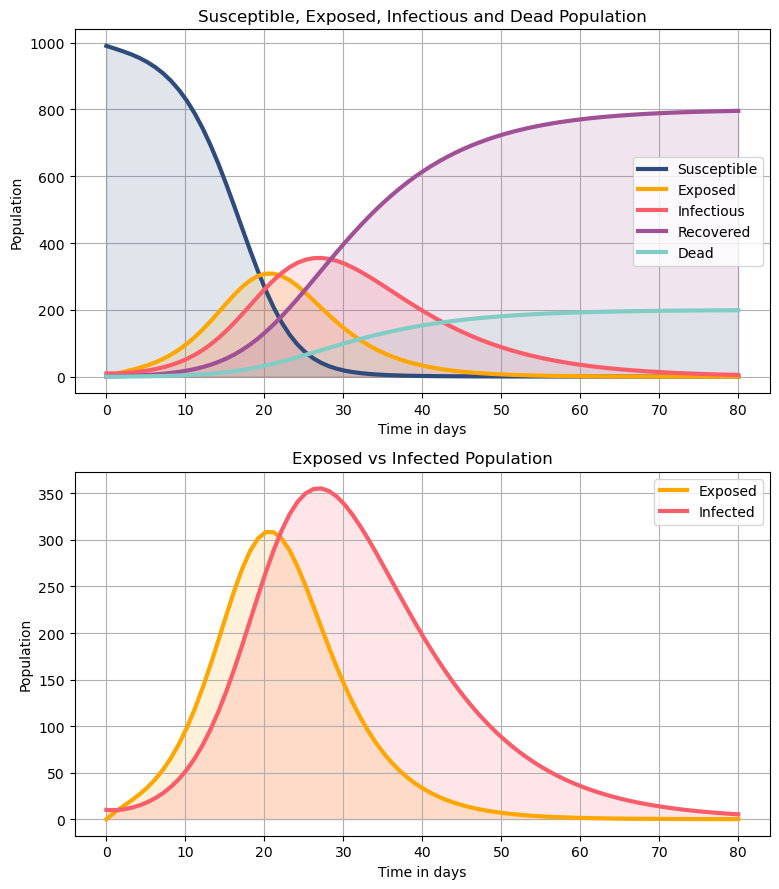

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#81cdc6"}

#parameter values
R0 = 8
t_incubation = 6
t_infective = 10
gamma = 1/t_infective
beta = R0 * gamma
alpha = 1/t_incubation
mu = 0.2 #CFR
# initial number of infected and recovered individuals
N=1000
I_initial = 0.01 * N
R_initial = 0
D_initial = 0
E_initial = 0
S_initial = N - E_initial - I_initial - R_initial - D_initial

# SIRD model differential equations.
def SEIRD(t, x, N, beta, gamma, mu, alpha):
    S, E, I, R, D = x
    dSdt = -beta * S * I / N
    dEdt =  beta * S * I / N - alpha * E
    dIdt =  alpha * E - gamma * (1 - mu) * I - mu * gamma * I
    dRdt = gamma * (1 - mu) * I
    dDdt = gamma * mu * I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

x_initial = S_initial, E_initial, I_initial, R_initial, D_initial
soln = solve_ivp(fun=SEIRD, t_span=(0, 80), y0=x_initial, args=(N, beta, gamma, mu, alpha), max_step=1) #solving
S, E, I, R, D = soln.y

#plotting the data
def plotdata(S, E, I, R, D): 
    fig = plt.figure(figsize=(15,9))
    ax = [fig.add_subplot(221, axisbelow=True), fig.add_subplot(223)]

    ax[0].plot(soln.t, S, color = COLORS['S'], lw=3, label='Susceptible')
    ax[0].fill_between(soln.t, 0, S, color=COLORS["S"], alpha=0.15)
    ax[0].plot(soln.t, E, color = COLORS['E'], lw=3, label='Exposed')
    ax[0].fill_between(soln.t, 0, E, color=COLORS["E"], alpha=0.15)
    ax[0].plot(soln.t, I, color = COLORS['I'], lw=3, label='Infectious')
    ax[0].fill_between(soln.t, 0, I, color=COLORS["I"], alpha=0.15)
    ax[0].plot(soln.t, R, color = COLORS['R'], lw=3, label='Recovered')
    ax[0].fill_between(soln.t, 0, R, color=COLORS["R"], alpha=0.15)
    ax[0].plot(soln.t, D, color = COLORS['D'], lw=3, label='Dead')
    ax[0].fill_between(soln.t, 0, D, color=COLORS["D"], alpha=0.15)
    ax[0].set_title('Susceptible, Exposed, Infectious and Dead Population')
    ax[0].set_xlabel('Time in days')
    ax[0].set_ylabel('Population')

    ax[1].plot(soln.t, E, color = COLORS['E'], lw=3, label='Exposed')
    ax[1].fill_between(soln.t, 0, E, color=COLORS["E"], alpha=0.15)
    ax[1].plot(soln.t, I, color = COLORS['I'], lw=3, label='Infected')
    ax[1].fill_between(soln.t, 0, I, color=COLORS["I"], alpha=0.15)
    ax[1].set_title('Exposed vs Infected Population')
    ax[1].set_xlabel('Time in days')
    ax[1].set_ylabel('Population')
    
    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()

plotdata(S, E, I, R, D)


Keeping the other parameters same, I will just vary the values of $R_{0}$ and see how things vary.

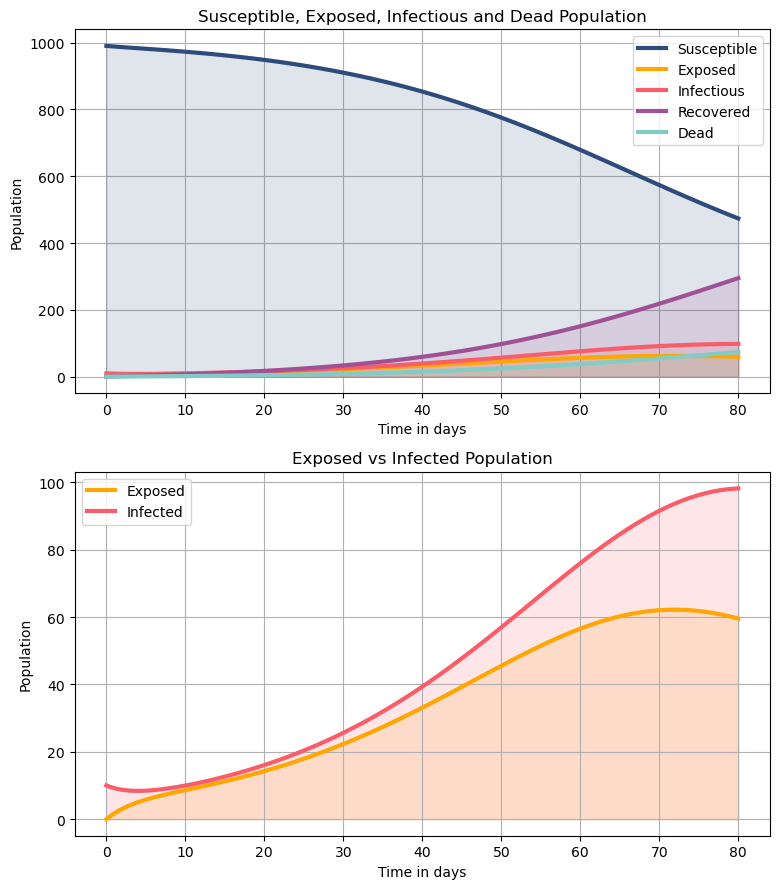

In [32]:
#altering parameter values
R0 = 2
t_incubation = 6
t_infective = 10
gamma = 1/t_infective
beta = R0 * gamma
alpha = 1/t_incubation
mu = 0.2 #CFR

soln = solve_ivp(fun=SEIRD, t_span=(0, 80), y0=x_initial, args=(N, beta, gamma, mu, alpha), max_step=1) #solving
S, E, I, R, D = soln.y
plotdata(S, E, I, R, D)

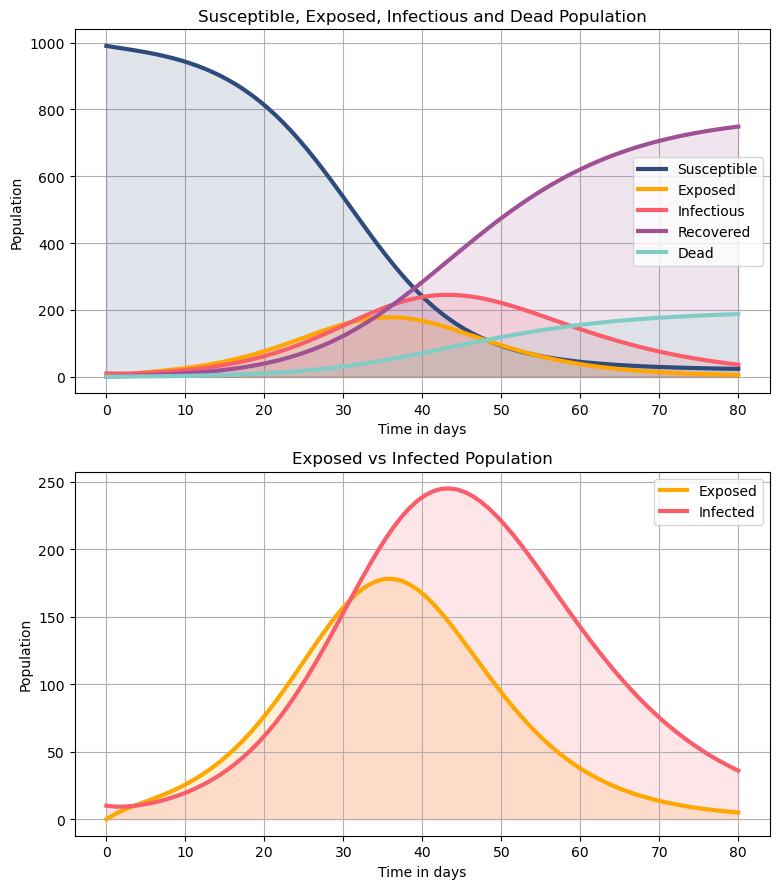

In [33]:
#altering parameter values
R0 = 4
t_incubation = 6
t_infective = 10
gamma = 1/t_infective
beta = R0 * gamma
alpha = 1/t_incubation
mu = 0.2 #CFR

soln = solve_ivp(fun=SEIRD, t_span=(0, 80), y0=x_initial, args=(N, beta, gamma, mu, alpha), max_step=1) #solving
S, E, I, R, D = soln.y
plotdata(S, E, I, R, D)

An increased value of $R_{0}$ brings the peak of infection higher and earlier. What if we also vary the duration of infection?

In [38]:
t = np.linspace(0, 80, 80)
R0_range = [2, 3, 4, 5, 7.5, 8, 10]
t_infective_range = [7, 10, 14, 21]

epicurves = {}

for i in R0_range:
    epicurves[i] = {}
    for j in t_infective_range:
        epicurves[i][j] = []
     

In [39]:
for i in R0_range:
    for j in t_infective_range:
        gamma = 1/j
        beta = i * gamma
        soln = solve_ivp(fun=SEIRD, t_span = (0, 80), y0=x_initial, args=(N, beta, gamma, mu, alpha), max_step=1)
        epicurves[i][j] = [t, soln.y[1], soln.y[0], soln.y[2]]


In [40]:
fig, axs = plt.subplots(len(R0_range), len(t_infective_range), sharex=True, sharey=True, figsize=(2*len(R0_range), 4*len(t_infective_range)), dpi=600)

for iidx, ival in enumerate(R0_range):
    for jidx, jval in enumerate(t_infective_range):
        axs[iidx][jidx].plot(epicurves[ival][jval][0], epicurves[ival][jval][1][:80], color=COLORS["I"], alpha=0.85, lw=2)
        axs[iidx][jidx].fill_between(epicurves[ival][jval][0], 0, epicurves[ival][jval][1][:80], color=COLORS["I"], alpha=0.15)

cols = [r"Infectious for {0} days".format(col) for col in t_infective_range]
rows = [r"$R_0 = {}$".format(row) for row in R0_range]

for ax, col in zip(axs[0], cols):
    ax.set_title(col, pad=15)
    
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, labelpad=10)
fig.suptitle("Trend of infected population size with varying $R_{0}$ and infectious period (N = 1000)")
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()